# Sorting Hat 
 ![hat.gif](https://media1.tenor.com/images/dd4957540761b13dcc76c9288bd33594/tenor.gif?itemid=13986841)

### Data
 

In [146]:
!pip install -q hvplot #https://hvplot.holoviz.org/

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [149]:
df_train = pd.read_csv("/Users/mariavogli/Downloads/dataset_train.csv",usecols=['Hogwarts_House','Arithmancy','Astronomy','Transfiguration','Charms','Charms','History_of_Magic','Flying','Potions','Arithmancy',
                                            'Defense_Against_the_Dark_Arts', 'Herbology','Divination','Care_of_Magical_Creatures','Muggle_Studies','Ancient_Runes',])
df_train
#df_train.head()

,Hogwarts_House,Arithmancy,Astronomy,Herbology,Defense_Against_the_Dark_Arts,Divination,Muggle_Studies,Ancient_Runes,History_of_Magic,Transfiguration,Potions,Care_of_Magical_Creatures,Charms,Flying
0,Ravenclaw,58384.00,-487.89,5.73,4.88,4.72,272.04,532.48,5.23,1039.79,3.79,0.72,-232.79,-26.89
1,Slytherin,67239.00,-552.06,-5.99,5.52,-5.61,-487.34,367.76,4.11,1058.94,7.25,0.09,-252.18,-113.45
2,Ravenclaw,23702.00,-366.08,7.73,3.66,6.14,664.89,602.59,3.56,1088.09,8.73,-0.52,-227.34,30.42
3,Gryffindor,32667.00,697.74,-6.50,-6.98,4.03,-537.00,523.98,-4.81,920.39,0.82,-0.01,-256.85,200.64
4,Gryffindor,60158.00,436.78,-7.82,NaN,2.24,-444.26,599.32,-3.44,937.43,4.31,-0.26,-256.39,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Gryffindor,49009.00,354.28,-4.54,-3.54,5.70,-497.24,618.22,-5.23,964.22,3.39,-0.65,-250.39,185.83
1596,Slytherin,63296.00,367.53,6.06,-3.68,1.76,-643.27,445.83,2.24,1056.15,5.83,-0.33,-246.43,44.80
1597,Gryffindor,63905.00,544.02,-3.20,-5.44,6.07,-385.15,635.21,-5.98,953.87,1.71,0.07,-251.64,198.47
1598,Hufflepuff,82713.00,453.68,3.44,-4.54,6.74,-831.74,383.44,3.81,1087.95,3.90,-0.53,-246.19,-76.81


In [150]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Hogwarts_House                 1600 non-null   object 
 1   Arithmancy                     1566 non-null   float64
 2   Astronomy                      1568 non-null   float64
 3   Herbology                      1567 non-null   float64
 4   Defense_Against_the_Dark_Arts  1569 non-null   float64
 5   Divination                     1561 non-null   float64
 6   Muggle_Studies                 1565 non-null   float64
 7   Ancient_Runes                  1565 non-null   float64
 8   History_of_Magic               1557 non-null   float64
 9   Transfiguration                1566 non-null   float64
 10  Potions                        1570 non-null   float64
 11  Care_of_Magical_Creatures      1560 non-null   float64
 12  Charms                         1600 non-null   f

In [151]:
df_train.shape

(1600, 14)

In [152]:
pd.set_option("display.float", "{:.2f}".format)
df_train.describe()

,Arithmancy,Astronomy,Herbology,Defense_Against_the_Dark_Arts,Divination,Muggle_Studies,Ancient_Runes,History_of_Magic,Transfiguration,Potions,Care_of_Magical_Creatures,Charms,Flying
count,1566.00,1568.00,1567.00,1569.00,1561.00,1565.00,1565.00,1557.00,1566.00,1570.00,1560.00,1600.00,1600.00
mean,49634.57,39.80,1.14,-0.39,3.15,-224.59,495.75,2.96,1030.10,5.95,-0.05,-243.37,21.96
std,16679.81,520.30,5.22,5.21,4.16,486.34,106.29,4.43,44.13,3.15,0.97,8.78,97.63
min,-24370.00,-966.74,-10.30,-10.16,-8.73,-1086.50,283.87,-8.86,906.63,-4.70,-3.31,-261.05,-181.47
25%,38511.50,-489.55,-4.31,-5.26,3.10,-577.58,397.51,2.22,1026.21,3.65,-0.67,-250.65,-41.87
50%,49013.50,260.29,3.47,-2.59,4.62,-419.16,463.92,4.38,1045.51,5.87,-0.04,-244.87,-2.51
75%,60811.25,524.77,5.42,4.90,5.67,254.99,597.49,5.83,1058.44,8.25,0.59,-232.55,50.56
max,104956.00,1016.21,11.61,9.67,10.03,1092.39,745.40,11.89,1098.96,13.54,3.06,-225.43,279.07


In [153]:
df_train.Hogwarts_House.value_counts()

Hufflepuff    529
Ravenclaw     443
Gryffindor    327
Slytherin     301
Name: Hogwarts_House, dtype: int64

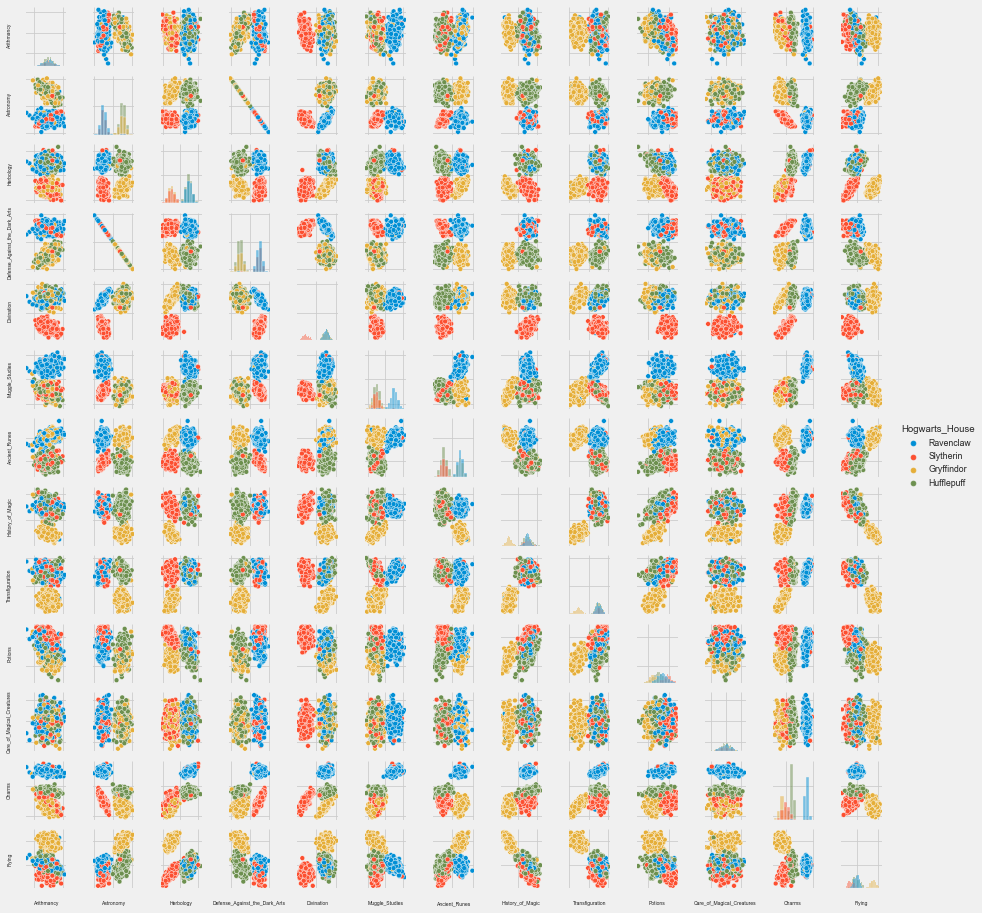

In [200]:

sns.set_context("paper", rc={"axes.labelsize":5})
g = sns.pairplot(df_train, hue='Hogwarts_House', diag_kind="hist", height=1)
g.set(xticklabels=[], yticklabels=[])
plt.show()

the pair plot and see what variables are useful to group people by. There is no use to use all features as some of them don't provide an obvious division into groups and can bring only noise. So far as we are looking for four clearly different groups, there Astrology, Herbology, Defense Against the Dark Arts, Ancient runes, Charms ish, Flying.

Two features - Defense Against the Dark Arts and Astronomy- are interesting and at first glance they look quite similar.

In [155]:
df_train.isna().sum()

Hogwarts_House                    0
Arithmancy                       34
Astronomy                        32
Herbology                        33
Defense_Against_the_Dark_Arts    31
Divination                       39
Muggle_Studies                   35
Ancient_Runes                    35
History_of_Magic                 43
Transfiguration                  34
Potions                          30
Care_of_Magical_Creatures        40
Charms                            0
Flying                            0
dtype: int64

In [156]:
data=df_train
#data.dropna(how='any')
data=data.fillna(data.mean())

In [157]:
data.isna().sum()

Hogwarts_House                   0
Arithmancy                       0
Astronomy                        0
Herbology                        0
Defense_Against_the_Dark_Arts    0
Divination                       0
Muggle_Studies                   0
Ancient_Runes                    0
History_of_Magic                 0
Transfiguration                  0
Potions                          0
Care_of_Magical_Creatures        0
Charms                           0
Flying                           0
dtype: int64

In [158]:
data['Hogwarts_House_1'] = data['Hogwarts_House']

In [159]:
data['Hogwarts_House_1'].replace(['Gryffindor', 'Slytherin', 'Ravenclaw', 'Hufflepuff'],
                        [0,1,2,3], inplace=True)

(14.5, -0.5)

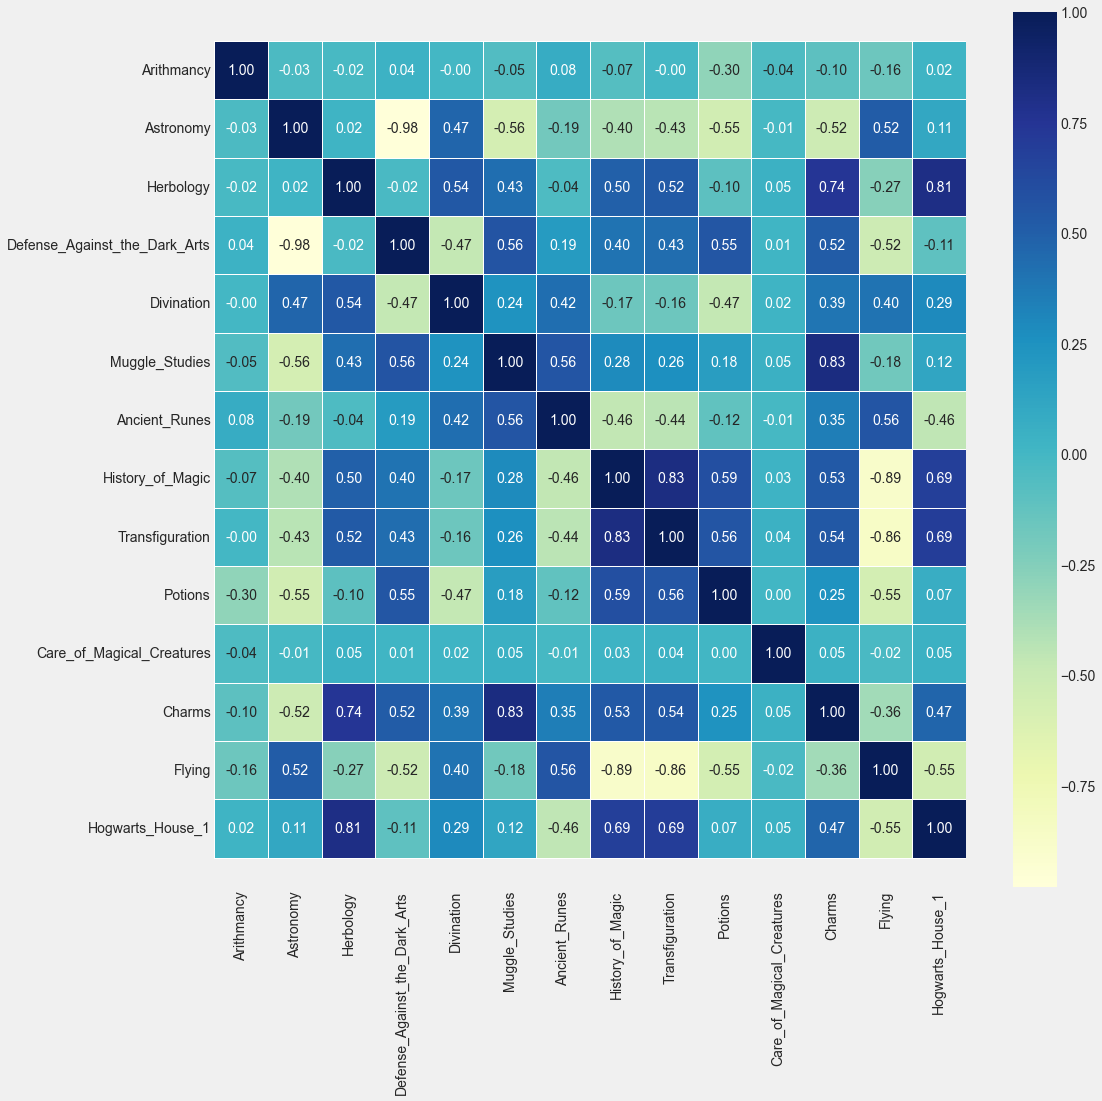

In [161]:
##Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [162]:
data.drop('Care_of_Magical_Creatures', axis=1).corrwith(data.Hogwarts_House_1).hvplot.barh(
    width=600, height=400, 
    title="Correlation Graph", 
    ylabel='Correlation', xlabel='Numerical Variables',
)

:Bars   [index]   (0)

In [163]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['Arithmancy', 'Astronomy', 'Muggle_Studies', 'Ancient_Runes', 'Transfiguration','Charms','Flying']
data[col_to_scale] = s_sc.fit_transform(data[col_to_scale])

In [164]:
data.head()

,Hogwarts_House,Arithmancy,Astronomy,Herbology,Defense_Against_the_Dark_Arts,Divination,Muggle_Studies,Ancient_Runes,History_of_Magic,Transfiguration,Potions,Care_of_Magical_Creatures,Charms,Flying,Hogwarts_House_1
0,Ravenclaw,0.53,-1.02,5.73,4.88,4.72,1.03,0.35,5.23,0.22,3.79,0.72,1.20,-0.50,2
1,Slytherin,1.07,-1.15,-5.99,5.52,-5.61,-0.55,-1.22,4.11,0.66,7.25,0.09,-1.00,-1.39,1
2,Ravenclaw,-1.57,-0.79,7.73,3.66,6.14,1.85,1.02,3.56,1.33,8.73,-0.52,1.83,0.09,2
3,Gryffindor,-1.03,1.28,-6.50,-6.98,4.03,-0.65,0.27,-4.81,-2.51,0.82,-0.01,-1.53,1.83,0
4,Gryffindor,0.64,0.77,-7.82,-0.39,2.24,-0.46,0.99,-3.44,-2.12,4.31,-0.26,-1.48,1.39,0


## Model Building


In [165]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [166]:
from sklearn.model_selection import train_test_split

X = data.drop('Hogwarts_House', axis=1)
y = data.Hogwarts_House_1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##  1. Logistic Regression

In [181]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.57%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision   0.99   0.99   0.98   0.99      0.99       0.99          0.99
recall      0.99   0.97   0.98   1.00      0.99       0.98          0.99
f1-score    0.99   0.98   0.98   0.99      0.99       0.99          0.99
support   240.00 216.00 302.00 362.00      0.99    1120.00       1120.00
_______________________________________________
Confusion Matrix: 
 [[238   1   1   0]
 [  1 209   5   1]
 [  1   1 296   4]
 [  0   0   1 361]]

Test Result:
Accuracy Score: 99.38%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2      3  accuracy  macro avg  weighted avg
precision  1.00  0.98   1.00   0.99      0.99       0.99          0.99
recall     0.99  1.00   0.99   1.00      0.99       0.99          0.99
f1-score   0.99  0.99   0.99   1.00      0.99       0.99     

In [182]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,98.57,99.38


## 2. K-nearest neighbors

In [169]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.86%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision   0.99   1.00   0.97   0.97      0.98       0.98          0.98
recall      0.97   0.96   0.98   0.99      0.98       0.98          0.98
f1-score    0.98   0.98   0.97   0.98      0.98       0.98          0.98
support   240.00 216.00 302.00 362.00      0.98    1120.00       1120.00
_______________________________________________
Confusion Matrix: 
 [[232   0   4   4]
 [  0 208   5   3]
 [  2   1 296   3]
 [  1   0   1 360]]

Test Result:
Accuracy Score: 98.96%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2      3  accuracy  macro avg  weighted avg
precision  0.99  0.98   0.99   0.99      0.99       0.99          0.99
recall     0.99  1.00   0.99   0.99      0.99       0.99          0.99
f1-score   0.99  0.99   0.99   0.99      0.99       0.99     

In [170]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,98.57,99.38
1,K-nearest neighbors,97.86,98.96


## 3. Support Vector machine


In [171]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.02%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision   1.00   1.00   0.98   0.99      0.99       0.99          0.99
recall      1.00   0.98   0.98   1.00      0.99       0.99          0.99
f1-score    1.00   0.99   0.98   0.99      0.99       0.99          0.99
support   240.00 216.00 302.00 362.00      0.99    1120.00       1120.00
_______________________________________________
Confusion Matrix: 
 [[239   0   1   0]
 [  0 212   3   1]
 [  1   1 297   3]
 [  0   0   1 361]]

Test Result:
Accuracy Score: 98.96%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2      3  accuracy  macro avg  weighted avg
precision  0.99  0.98   0.99   0.99      0.99       0.99          0.99
recall     0.99  1.00   0.99   0.99      0.99       0.99          0.99
f1-score   0.99  0.99   0.99   0.99      0.99       0.99     

In [172]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,98.57,99.38
1,K-nearest neighbors,97.86,98.96
2,Support Vector Machine,99.02,98.96


## 4. Decision tree classifier

In [173]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision   1.00   1.00   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00   1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00   1.00   1.00      1.00       1.00          1.00
support   240.00 216.00 302.00 362.00      1.00    1120.00       1120.00
_______________________________________________
Confusion Matrix: 
 [[240   0   0   0]
 [  0 216   0   0]
 [  0   0 302   0]
 [  0   0   0 362]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2      3  accuracy  macro avg  weighted avg
precision  1.00  1.00   1.00   1.00      1.00       1.00          1.00
recall     1.00  1.00   1.00   1.00      1.00       1.00          1.00
f1-score   1.00  1.00   1.00   1.00      1.00       1.00   

In [174]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,98.57,99.38
1,K-nearest neighbors,97.86,98.96
2,Support Vector Machine,99.02,98.96
3,Decision Tree Classifier,100.00,100.00


## 5. Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision   1.00   1.00   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00   1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00   1.00   1.00      1.00       1.00          1.00
support   240.00 216.00 302.00 362.00      1.00    1120.00       1120.00
_______________________________________________
Confusion Matrix: 
 [[240   0   0   0]
 [  0 216   0   0]
 [  0   0 302   0]
 [  0   0   0 362]]

Test Result:
Accuracy Score: 99.58%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2      3  accuracy  macro avg  weighted avg
precision  1.00  0.98   1.00   1.00      1.00       0.99          1.00
recall     1.00  1.00   0.99   0.99      1.00       1.00          1.00
f1-score   1.00  0.99   1.00   1.00      1.00       1.00    

In [176]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,98.57,99.38
1,K-nearest neighbors,97.86,98.96
2,Support Vector Machine,99.02,98.96
3,Decision Tree Classifier,100.00,100.00
4,Random Forest Classifier,100.00,99.58


## 6. XGBoost Classifier

In [177]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision   1.00   1.00   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00   1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00   1.00   1.00      1.00       1.00          1.00
support   240.00 216.00 302.00 362.00      1.00    1120.00       1120.00
_______________________________________________
Confusion Matrix: 
 [[240   0   0   0]
 [  0 216   0   0]
 [  0   0 302   0]
 [  0   0   0 362]]

Test Result:
Accuracy Score: 99.79%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2      3  accuracy  macro avg  weighted avg
precision  1.00  0.99   1.00   1.00      1.00       1.00          1.00
recall     1.00  1.00   0.99   1.00      1.00       1.00          1.00
f1-score   1.00  0.99   1.00   1.00      1.00       1.00    

In [178]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,98.57,99.38
1,K-nearest neighbors,97.86,98.96
2,Support Vector Machine,99.02,98.96
3,Decision Tree Classifier,100.00,100.00
4,Random Forest Classifier,100.00,99.58
5,XGBoost Classifier,100.00,99.79


# Models hyperparameter tuning

## 1. Logistic Regression Hyperparameter tuning


In [183]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 4.281332398719396, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 98.84%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision   1.00   0.99   0.98   0.99      0.99       0.99          0.99
recall      1.00   0.97   0.98   1.00      0.99       0.99          0.99
f1-score    1.00   0.98   0.98   0.99      0.99       0.99          0.99
support   240.00 216.00 302.00 362.00      0.99    1120.00       1120.00
_______________________________________________
Confusion Matrix: 
 [[239   1   0   0]
 [  1 210   5   0]
 [  0   1 297   4]
 [  0   0   1 361]]

Test Result:
Accuracy Score: 99.38%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2      3  accuracy  macro avg  weighted avg
precision  1.00  0.98   1.00   0.99      0.99       0.99          0.99
recal

In [184]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,98.84,99.38


## 2. K-nearest neighbors Hyperparameter Tuning

In [185]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


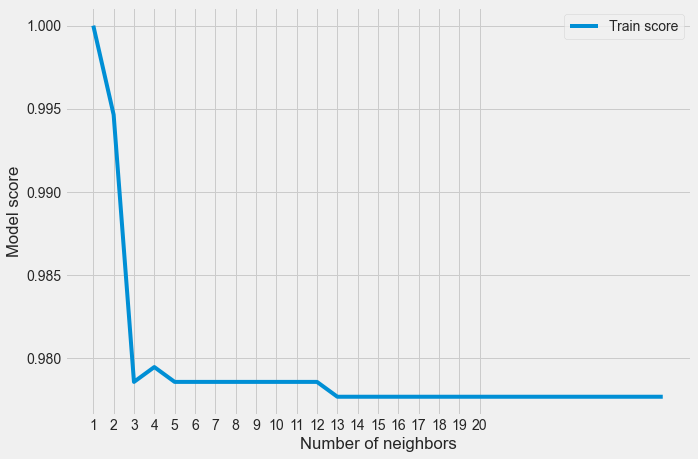

In [186]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [187]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.77%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision   0.99   1.00   0.97   0.97      0.98       0.98          0.98
recall      0.97   0.96   0.98   0.99      0.98       0.98          0.98
f1-score    0.98   0.98   0.97   0.98      0.98       0.98          0.98
support   240.00 216.00 302.00 362.00      0.98    1120.00       1120.00
_______________________________________________
Confusion Matrix: 
 [[232   0   4   4]
 [  0 208   5   3]
 [  2   1 295   4]
 [  1   0   1 360]]

Test Result:
Accuracy Score: 98.75%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2      3  accuracy  macro avg  weighted avg
precision  0.99  0.98   0.99   0.99      0.99       0.99          0.99
recall     0.99  1.00   0.98   0.99      0.99       0.99          0.99
f1-score   0.99  0.99   0.99   0.99      0.99       0.99     

In [188]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,98.84,99.38
1,Tuned K-nearest neighbors,97.77,98.75


## 3. Support Vector Machine Hyperparameter Tuning

In [189]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 0.5, 'gamma': 0.001, 'kernel': 'linear'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision   1.00   1.00   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00   1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00   1.00   1.00      1.00       1.00          1.00
support   240.00 216.00 302.00 362.00      1.00    1120.00       1120.00
_______________________________________________
Confusion Matrix: 
 [[240   0   0   0]
 [  0 216   0   0]
 [  0   0 302   0]
 [  0   0   0 362]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2      3  accuracy  macro avg  weighted avg
precision  1.00  1.00   1.00   1.00      1.00       1.00          1.00
recall 

In [190]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,98.84,99.38
1,Tuned K-nearest neighbors,97.77,98.75
2,Tuned Support Vector Machine,100.00,100.00


## 4. Decision Tree Classifier Hyperparameter Tuning

In [191]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best_params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision   1.00   1.00   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00   1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00   1.00   1.00      1.00       1.00          1.00
support   240.00 216.00 302.00 362.00      1.00    1120.00       1120.00
_______________________________________________
Confusion Matrix: 
 [[240   0   0   0]
 [  0 216   0   0]
 [  0   0 302   0]
 [  0   0   0 362]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2      3  accuracy  macro avg  weighted avg
precision  1.00  

In [192]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,98.84,99.38
1,Tuned K-nearest neighbors,97.77,98.75
2,Tuned Support Vector Machine,100.00,100.00
3,Tuned Decision Tree Classifier,100.00,100.00


## 5. Random Forest Classifier Hyperparameter Tuning

In [195]:
#Se vuoi eseguirlo cambia il numero di n_jobs perchè altrimenti ti impalla il pc. 
#Btw, ci impiega 5-6 minuti 
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision   1.00   1.00   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00   1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00   1.00   1.00      1.00       1.00          1.00
support   240.00 216.00 302.00 362.00      1.00    1120.00       1120.00
_______________________________________________
Confusion Matrix: 
 [[240   0   0   0]
 [  0 216   0   0]
 [  0   0 302   0]
 [  0   0   0 362]]

Test Result:
Accuracy Score: 99.58%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2      3  accuracy  macro avg  weighted avg
precision  

In [196]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,98.84,99.38
1,Tuned K-nearest neighbors,97.77,98.75
2,Tuned Support Vector Machine,100.00,100.00
3,Tuned Decision Tree Classifier,100.00,100.00
4,Tuned Random Forest Classifier,100.00,99.58


 ## 6. XGBoost Classifier Hyperparameter Tuning

In [197]:
param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=3, n_iter=50, 
    scoring='accuracy', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best paramters: {'learning_rate': 0.7225604977944609, 'max_depth': 8, 'n_estimators': 413}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision   1.00   1.00   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00   1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00   1.00   1.00      1.00       1.00          1.00
support   240.00 216.00 302.00 362.00      1.00    1120.00       1120.00
_______________________________________________
Confusion Matrix: 
 [[240   0   0   0]
 [  0 216   0   0]
 [  0   0 302   0]
 [  0   0   0 362]]

Test Result:
Accuracy Score: 99.79%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2      3  accuracy  macro avg  weighted avg
precision  1.00  0.99   1.00   1.00      1.00    

In [198]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,98.84,99.38
1,Tuned K-nearest neighbors,97.77,98.75
2,Tuned Support Vector Machine,100.00,100.00
3,Tuned Decision Tree Classifier,100.00,100.00
4,Tuned Random Forest Classifier,100.00,99.58
5,Tuned XGBoost Classifier,100.00,99.79


# Histogram/ Scatterplot 

In [208]:
import pandas as pd

In [209]:
def print_subjects_legend():
    print("Subjects Legend: ARITHMANCY = 1, ASTRONOMY = 2, HERBOLOGY = 3, DEFENSE_AGAINST_THE_DARK_ARTS = 4\n"
          ", DIVINATION = 5, MUGGLE_STUDIES = 6, ANCIENT_RUNES = 7, HISTORY_OF_MAGIC = 8, TRANSFIGURATION = 9\n"
          ", POTIONS = 10, CARE_OF_MAGICAL_CREATURES = 11, CHARMS = 12, FLYING = 13\n")


def user_input_histogram():
    print_subjects_legend()
    while True:
        try:
            val = input("Pick the subject that you want to have an histogram for: ")
            while int(val) < 1 or int(val) > 13:
                val = input("Please pick a valid index ranging from 1 - 13: ")
            break
        except ValueError:
            print("Please input integer only.")
            continue

    return int(val)


def user_input_scatterplot():
    print_subjects_legend()
    while True:
        try:
            val1 = input("Pick the first subject for the scatter plot: ")
            while int(val1) < 1 or int(val1) > 13:
                val1 = input("Please pick a valid index ranging from 1 - 13: ")
            break
        except ValueError:
            print("Please input integer only.")
            continue

    while True:
        try:
            val2 = input("Pick the second subject for the scatter plot: ")
            while int(val2) < 1 or int(val2) > 13:
                val2 = input("Please pick a valid index ranging from 1 - 13: ")
            break
        except ValueError:
            print("Please input integer only.")
            continue

    return int(val1), int(val2)


In [210]:
from enum import Enum
import matplotlib.pyplot as plt


class Subject(Enum):
    Arithmancy = 1
    Astronomy = 2
    Herbology = 3
    Defense_Against_the_Dark_Arts = 4
    Divination = 5
    Muggle_Studies = 6
    Ancient_Runes = 7
    History_of_Magic = 8
    Transfiguration = 9
    Potions = 10
    Care_of_Magical_Creatures = 11
    Charms = 12
    Flying = 13


def create_data(input_data, val):
    subject = Subject(val).name
    new_subject = subject.replace('_', ' ')

    output_data = input_data[["Hogwarts_House", new_subject]].copy()

    return output_data, new_subject


def scores_per_house(data, subject):
    Gryffindor_scores = []
    Slytherin_scores = []
    Ravenclaw_scores = []
    Hufflepuff_scores = []

    for ind in data.index:
        if data['Hogwarts_House'][ind] == 'Gryffindor':
            Gryffindor_scores.append(data[subject][ind])
        elif data['Hogwarts_House'][ind] == 'Slytherin':
            Slytherin_scores.append(data[subject][ind])
        elif data['Hogwarts_House'][ind] == 'Ravenclaw':
            Ravenclaw_scores.append(data[subject][ind])
        else:
            Hufflepuff_scores.append(data[subject][ind])

    return Gryffindor_scores, Slytherin_scores, Ravenclaw_scores, Hufflepuff_scores


def plot_histograms(data, subject):
    Gryffindor_scores, Slytherin_scores, Ravenclaw_scores, Hufflepuff_scores = scores_per_house(data, subject)

    plt.hist(Gryffindor_scores, color='red', alpha=0.5)
    plt.hist(Slytherin_scores, color='green', alpha=0.5)
    plt.hist(Ravenclaw_scores, color='blue', alpha=0.5)
    plt.hist(Hufflepuff_scores, color='yellow', alpha=0.5)


    legend = ['Gryffindor', 'Slytherin', 'Ravenclaw', 'Hufflepuff']
    plt.legend(legend, loc="upper right", frameon=False)
    plt.title(subject)
    plt.xlabel('Marks')
    plt.ylabel('Number of students')
    plt.show()


def plot_scatter(data_subject1, subject1, data_subject2, subject2):
    Gryffindor_scores1, Slytherin_scores1, Ravenclaw_scores1, Hufflepuff_scores1 = scores_per_house(data_subject1, subject1)
    Gryffindor_scores2, Slytherin_scores2, Ravenclaw_scores2, Hufflepuff_scores2 = scores_per_house(data_subject2, subject2)

    plt.scatter(Gryffindor_scores1, Gryffindor_scores2, color='red', alpha=0.5)
    plt.scatter(Slytherin_scores1, Slytherin_scores2, color='green', alpha=0.5)
    plt.scatter(Ravenclaw_scores1, Ravenclaw_scores2, color='blue', alpha=0.5)
    plt.scatter(Hufflepuff_scores1, Hufflepuff_scores2, color='yellow', alpha=0.5)

    legend = ['Gryffindor', 'Slytherin', 'Ravenclaw', 'Hufflepuff']
    plt.legend(legend, loc="upper right", frameon=False)
    plt.xlabel(subject1)
    plt.ylabel(subject2)
    plt.show()

Subjects Legend: ARITHMANCY = 1, ASTRONOMY = 2, HERBOLOGY = 3, DEFENSE_AGAINST_THE_DARK_ARTS = 4
, DIVINATION = 5, MUGGLE_STUDIES = 6, ANCIENT_RUNES = 7, HISTORY_OF_MAGIC = 8, TRANSFIGURATION = 9
, POTIONS = 10, CARE_OF_MAGICAL_CREATURES = 11, CHARMS = 12, FLYING = 13

Pick the first subject for the scatter plot: 2
Pick the second subject for the scatter plot: 3


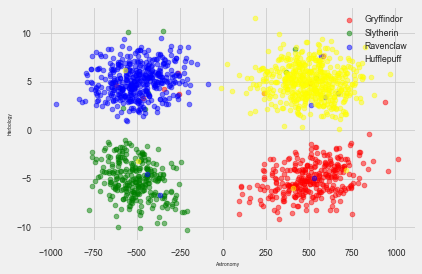

In [211]:
if __name__ == "__main__":
    data = pd.read_csv("/Users/mariavogli/Downloads/dataset_train.csv")

    # receive input from user for which subjects to create scatter plot
    val1, val2 = user_input_scatterplot()

    data_subject1, subject1 = create_data(data, val1)
    data_subject2, subject2 = create_data(data, val2)
    plot_scatter(data_subject1, subject1, data_subject2, subject2)

Subjects Legend: ARITHMANCY = 1, ASTRONOMY = 2, HERBOLOGY = 3, DEFENSE_AGAINST_THE_DARK_ARTS = 4
, DIVINATION = 5, MUGGLE_STUDIES = 6, ANCIENT_RUNES = 7, HISTORY_OF_MAGIC = 8, TRANSFIGURATION = 9
, POTIONS = 10, CARE_OF_MAGICAL_CREATURES = 11, CHARMS = 12, FLYING = 13

Pick the subject that you want to have an histogram for: 9


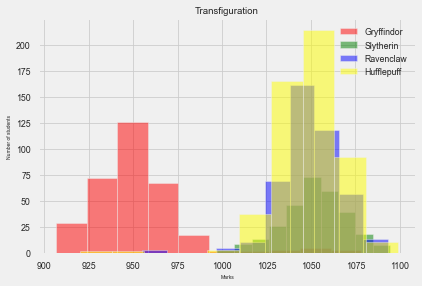

In [215]:
if __name__ == "__main__":
    data = pd.read_csv('/Users/mariavogli/Downloads/dataset_train.csv')


    # receive input from user for which subject to create histogram
    val = user_input_histogram()

    data_subject, subject = create_data(data, val)
    plot_histograms(data_subject, subject)